### Import Libs

In [1]:
from scipy import special as sc
import matplotlib.pyplot as plt
import numpy as np

import random
import itertools

In [2]:
#Constants, experiment parameters
NUM_QUEENS = 8
POPULATION_SIZE = 10
MIXING_NUMBER = 2
MUTATION_RATE = 0.05

### Create Individual

In [3]:
def create_individual():
    # TODO: create a random chromosome
    return [random.randint(1, 8) for _ in range(8)]

### Generate Population

In [4]:
def generate_population(population_size:int = 20):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)
    
    return population

### Parent Selection

In [5]:
def parent_selection(population):
    parents = []
    
    for ind in population:
        #select parents with probability proportional to their fitness score
        if random.randrange(int(sc.comb(NUM_QUEENS, 2)*2)) < fitness_score(ind):
            parents.append(ind)
    
    return parents

### Next Generation Selection

In [6]:
def next_generation_selection(children_population):
    next_generation = []
    #TODO: choose the next_generation
    parents = parent_selection(population)

    #recombination. Create new offsprings
    offsprings = crossover(parents)

    #mutation
    offsprings = list(map(mutate, offsprings))

    #introduce top-scoring individuals from previous generation and keep top fitness individuals
    next_generation = offsprings

    for ind in population:
        next_generation.append(ind)

    next_generation = sorted(next_generation, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]
            
    return next_generation

### Crossover

In [7]:
def crossover(parents):
    
    #random indexes to to cross states with
    cross_points = random.sample(range(NUM_QUEENS), MIXING_NUMBER - 1)
    offsprings = []
    
    #all permutations of parents
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))
    
    for perm in permutations:
        offspring = []
        
        #track starting index of sublist
        start_pt = 0
        
        for parent_idx, cross_point in enumerate(cross_points): #doesn't account for last parent
            
            #sublist of parent to be crossed
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)
            
            #update index pointer
            start_pt = cross_point
            
        #last parent
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)
        
        #flatten the list since append works kinda differently
        offsprings.append(list(itertools.chain(*offspring)))
    
    return offsprings

### Mutation

In [8]:
def mutate(seq):
    for row in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[row] = random.randrange(NUM_QUEENS)
    
    return seq

### Score Function

In [9]:
def fitness_score(seq):
    score = 0
    
    for row in range(NUM_QUEENS):
        col = seq[row]
        
        for other_row in range(NUM_QUEENS):
            
            #queens cannot pair with itself
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            #score++ if every pair of queens are non-attacking.
            score += 1
    
    #divide by 2 as pairs of queens are commutative
    return score/2

## Calculate Population Fitness

In [10]:
def population_fitness(population):
    population_fitness = 0
    individuals_fitnesses:dict = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness += fitness_sc
        individuals_fitnesses[tuple(chromosome)] = fitness_sc
    return individuals_fitnesses ,population_fitness

### Termination Condition

In [11]:
def check_end(population, to_print=False) -> bool:
    #TODO: check end of algorithm
    for ind in population:
        score = fitness_score(ind)
        if to_print:
            print(f'{ind}. Score: {score}')
        if score == sc.comb(NUM_QUEENS, 2):
            print('Solution found 😁')
            print(f'{ind}. Score: {score}')
            return True
    
    if to_print:
        print('Solution not found')
    return False

### Run Your Algorithms

In [12]:
def normalizer(l):
    for i in l:
        if type(i)==int:
            print(i)
            l.remove(i)

In [14]:
# The genetic algorithm
generation = 0
solution_is_found = False
fitness = []

population = generate_population()
population , pf = population_fitness(population)

while not check_end(population):
    # TODO: this is a default setup which you maybe need to change.
    population = parent_selection(population)
    population = crossover(population)
    population = mutate(population)
    normalizer(population)
    individuals_fitnesses , pf = population_fitness(population)
    population = next_generation_selection(population)
    
    generation += 1
    if(len(population)!=0):
        avg_fit = pf / len(population)
        fitness.append(avg_fit)


2
7
5
2
0
2
3
Solution found 😁
[1, 4, 6, 0, 2, 7, 5, 3]. Score: 28.0


### See Your Progress Over Generations

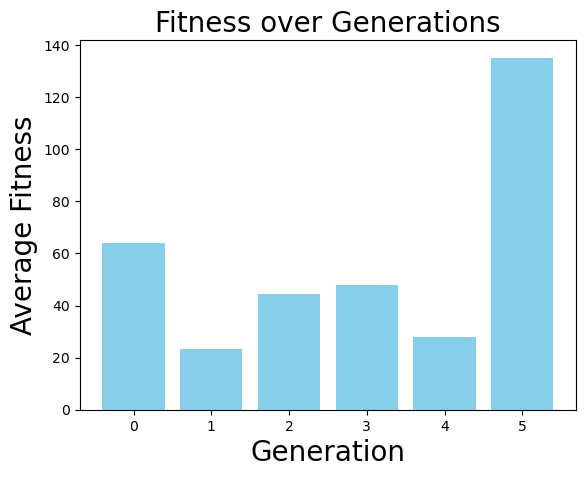

In [15]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()